## import

In [155]:
from tqdm.notebook import tqdm


In [2]:
raw_genre_gn_all = pd.read_json('./raw_data/genre_gn_all.json', typ = 'seriese')
raw_song_meta = pd.read_json('./raw_data/song_meta.json')
raw_test = pd.read_json('./raw_data/test.json')
raw_train = pd.read_json('./raw_data/train.json')
raw_val = pd.read_json('./raw_data/val.json')

## 장르

In [45]:
genre_gn_all = pd.DataFrame(raw_genre_gn_all, columns = ['genre_name']).reset_index().rename(columns={"index" : "genre_code"})

In [46]:
genre_gn_all.head()

,genre_code,genre_name
0,GN0100,발라드
1,GN0101,세부장르전체
2,GN0102,'80
3,GN0103,'90
4,GN0104,'00


In [47]:
genre_gn_all['genre_name'].unique()

array(['발라드', '세부장르전체', "'80", "'90", "'00", "'10-", '댄스', '랩/힙합',
       '랩 스타일', '보컬 스타일', '언더그라운드 힙합', '시대별', 'R&B/Soul', '어반', 'R&B',
       '인디음악', '포크', '록', '일렉', '힙합', '록/메탈', "'70", '성인가요', '신세대트로트',
       '전설의트로트', '뽕짝트로트', '트로트메들리', "트로트'60-'70", "트로트'80-'90", "트로트'00-",
       "성인가요'80-'90", "성인가요'00-", '포크/블루스', "'60-'70", "'80-'90", 'POP',
       '얼터너티브팝', '올디스', '월드팝', '모던록', '얼터너티브록', '프로그레시브/아트록', '하드록',
       '헤비메탈', '뉴메탈/하드코어', '포스트록', "'60", '일렉트로니카', '하우스', '클럽뮤직',
       '일렉트로닉팝', '팝랩', '얼터너티브힙합', '갱스터/하드코어랩', 'East&West', '컨템포러리 R&B',
       '소울', '포크/블루스/컨트리', '블루스', '컨트리', "'00-", 'OST', '국내영화', '국외영화',
       '국내드라마', '국외드라마', '애니메이션/게임', '국내뮤지컬', '국외뮤지컬', '애니메이션/웹툰', '게임',
       '클래식', '관현악', '교향곡', '실내악', '협주곡', '독주곡', '오페라', '크로스오버', '현대음악',
       '성악/합창곡', '발레/무용', '지휘/연주자', '컴필레이션', '교향/관현악', '오페라/성악', '재즈',
       '보컬재즈', '애시드/퓨전/팝', 'Bop', '보사노바', 'J-Jazz', '라틴재즈', '빅밴드/스윙',
       '악기별', '뉴에이지', '이지리스닝', 'J-Newage', '기능성음악', '기타', '피아노', 'J-POP',
 

### genre_code : 대분류

In [56]:
genre_code = genre_gn_all[genre_gn_all['genre_code'].str[-2:] == "00"]
genre_code.head()

,genre_code,genre_name
0,GN0100,발라드
6,GN0200,댄스
12,GN0300,랩/힙합
18,GN0400,R&B/Soul
22,GN0500,인디음악


In [69]:
import requests
from bs4 import BeautifulSoup

### dtl_genre_code : 소분류

In [70]:
dtl_genre_code = genre_gn_all[genre_gn_all['genre_code'].str[-2:] != "00"]
dtl_genre_code.columns = ['dtl_genre_code','dtl_genre_name']
dtl_genre_code.head()

,dtl_genre_code,dtl_genre_name
1,GN0101,세부장르전체
2,GN0102,'80
3,GN0103,'90
4,GN0104,'00
5,GN0105,'10-


### genre : 장르 전체 df

In [74]:
genre_code['join_code'] = genre_code['genre_code'].str[:4]
dtl_genre_code['join_code'] = dtl_genre_code['dtl_genre_code'].str[:4]

genre = pd.merge(genre_code, dtl_genre_code, how = 'left', on = 'join_code')
genre = genre[['genre_code','genre_name','dtl_genre_code','dtl_genre_name']]
genre

,genre_code,genre_name,dtl_genre_code,dtl_genre_name
0,GN0100,발라드,GN0101,세부장르전체
1,GN0100,발라드,GN0102,'80
2,GN0100,발라드,GN0103,'90
3,GN0100,발라드,GN0104,'00
4,GN0100,발라드,GN0105,'10-
...,...,...,...,...
220,GN2800,뮤직테라피,GN2806,반려동물
221,GN2900,뮤지컬,GN2901,세부장르전체
222,GN2900,뮤지컬,GN2902,국내뮤지컬
223,GN2900,뮤지컬,GN2903,국외뮤지컬


## 곡
- list안에 들어있는 값들은 유니크한 값이 아님

In [98]:
raw_song_meta.head()

,song_gn_dtl_gnr_basket,issue_date,album_name,album_id,artist_id_basket,song_name,song_gn_gnr_basket,artist_name_basket,id
0,[GN0901],20140512,불후의 명곡 - 7080 추억의 얄개시대 팝송베스트,2255639,[2727],Feelings,[GN0900],[Various Artists],0
1,"[GN1601, GN1606]",20080421,"Bach : Partitas Nos. 2, 3 & 4",376431,[29966],"Bach : Partita No. 4 In D Major, BWV 828 - II....",[GN1600],[Murray Perahia],1
2,[GN0901],20180518,Hit,4698747,[3361],Solsbury Hill (Remastered 2002),[GN0900],[Peter Gabriel],2
3,"[GN1102, GN1101]",20151016,Feeling Right (Everything Is Nice) (Feat. Popc...,2644882,[838543],Feeling Right (Everything Is Nice) (Feat. Popc...,[GN1100],[Matoma],3
4,"[GN1802, GN1801]",20110824,그남자 그여자,2008470,[560160],그남자 그여자,[GN1800],[Jude Law],4


In [99]:
# 장르 분류가 이상한듯
raw_song_meta[raw_song_meta['song_name']=="그남자 그여자"]

,song_gn_dtl_gnr_basket,issue_date,album_name,album_id,artist_id_basket,song_name,song_gn_gnr_basket,artist_name_basket,id
4,"[GN1802, GN1801]",20110824,그남자 그여자,2008470,[560160],그남자 그여자,[GN1800],[Jude Law],4
214165,"[GN1802, GN1801]",20110830,The One,2009237,[561054],그남자 그여자,[GN1800],[Gene Guynes],214165
306681,[GN0101],20090112,뉴 발라드 베스트,471062,[2727],그남자 그여자,[GN0100],[Various Artists],306681
511554,[GN0101],20090903,블로그에서 배경음악으로 가장 많이 사랑받는 인기가요발라드,659252,[2727],그남자 그여자,[GN0100],[Various Artists],511554
525595,"[GN1502, GN1501]",20071228,첼로의 향기,362762,[2727],그남자 그여자,[GN1500],[Various Artists],525595
698986,"[GN1501, GN1504]",20100916,결혼해주세요 OST,1025523,"[431646, 25975]",그남자 그여자,[GN1500],"[예송, 조은희 (Joni)]",698986


In [48]:
raw_song_meta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 707989 entries, 0 to 707988
Data columns (total 9 columns):
song_gn_dtl_gnr_basket    707989 non-null object
issue_date                707989 non-null int64
album_name                707985 non-null object
album_id                  707989 non-null int64
artist_id_basket          707989 non-null object
song_name                 707989 non-null object
song_gn_gnr_basket        707989 non-null object
artist_name_basket        707989 non-null object
id                        707989 non-null int64
dtypes: int64(3), object(6)
memory usage: 48.6+ MB


In [63]:
# 곡 아이디(id)와 대분류 장르코드 리스트(song_gn_gnr_basket) 추출
song_gnr_map = raw_song_meta.loc[:, ['id', 'song_gn_gnr_basket']]

# 빈 list에 None값을 넣어줌
song_gnr_map['song_gn_gnr_basket'] = song_gnr_map.song_gn_gnr_basket.apply(lambda x: x if len(x) >= 1 else [None])


# unnest song_gn_gnr_basket
song_gnr_map_unnest = np.dstack(
    (
        np.repeat(song_gnr_map.id.values, list(map(len, song_gnr_map.song_gn_gnr_basket))), 
        np.concatenate(song_gnr_map.song_gn_gnr_basket.values)
    )
)

# unnested 데이터프레임 생성 : song_gnr_map
song_gnr_map = pd.DataFrame(data = song_gnr_map_unnest[0], columns = song_gnr_map.columns)
song_gnr_map['id'] = song_gnr_map['id'].astype(str)
song_gnr_map.rename(columns = {'id' : 'song_id', 'song_gn_gnr_basket' : 'gnr_code'}, inplace = True)

# unnest 객체 제거
del song_gnr_map_unnest
song_gnr_map

,song_id,gnr_code
0,0,GN0900
1,1,GN1600
2,2,GN0900
3,3,GN1100
4,4,GN1800
...,...,...
803913,707984,GN2000
803914,707985,GN0900
803915,707986,GN0100
803916,707987,GN1800


In [64]:
# 1. 곡 별 장르 개수 count 테이블 생성 : song_gnr_count
song_gnr_count = song_gnr_map.groupby('song_id').gnr_code.nunique().reset_index(name = 'mapping_gnr_cnt')

# 2. 1번에서 생성한 테이블을 가지고 매핑된 장르 개수 별 곡 수 count 테이블 생성 : gnr_song_count
gnr_song_count = song_gnr_count.groupby('mapping_gnr_cnt').song_id.nunique().reset_index(name = '매핑된 곡 수')

# 3. 2번 테이블에 비율 값 추가
gnr_song_count.loc[:,'비율(%)'] = round(gnr_song_count['매핑된 곡 수']/sum(gnr_song_count['매핑된 곡 수'])*100, 2)
gnr_song_count = gnr_song_count.reset_index().rename(columns = {'mapping_gnr_cnt' : '장르 수'})
gnr_song_count[['장르 수', '매핑된 곡 수', '비율(%)']]

,장르 수,매핑된 곡 수,비율(%)
0,0,1059,0.15
1,1,612806,86.56
2,2,92378,13.05
3,3,1694,0.24
4,4,48,0.01
5,5,1,0.00
6,6,3,0.00


In [60]:
raw_song_meta[(raw_song_meta['song_gn_gnr_basket'].apply(len) == 0)]

,song_gn_dtl_gnr_basket,issue_date,album_name,album_id,artist_id_basket,song_name,song_gn_gnr_basket,artist_name_basket,id
21,[],20200331,WHY,10410508,[417985],WHY,[],[4minute],21
399,[],20200106,뽀로로 겨울 동요,10372098,[1703695],초코 초코 핫초코,[],[아이코닉스 (ICONIX)],399
803,[],20040901,Tropical Lullaby,153435,[848353],Kalua Lullaby,[],[The Moonlighters],803
1089,[],20190924,66,10331496,[2747498],How are you,[],[유노이아 (Eunoia)],1089
2588,[],20080709,명상태교음악 `평온` Vol.4,392967,[2727],Dvorak : Humoresque No.7 Op.101,[],[Various Artists],2588
...,...,...,...,...,...,...,...,...,...
701617,[],20191205,Special Christmas (크리스마스 캐롤),10361888,[28566],The Christmas Spell,[],[Peggy Lee],701617
703137,[],20200417,BEIGE 0.5,10419112,[873162],손톱,[],[Kid Milli],703137
704799,[],20200331,Love Tension,10410516,[417985],Love Tension,[],[4minute],704799
705983,[],20200106,TREASURE EPILOGUE : Action To Answer,10371984,[2398260],지평선 (Horizon),[],[ATEEZ (에이티즈)],705983


# train & test data

In [161]:
raw_song_meta['song_gn_dtl_gnr']= raw_song_meta['song_gn_dtl_gnr_basket'].apply(','.join)

In [163]:
raw_song_meta['artist_name']= raw_song_meta['artist_name_basket'].apply(','.join)

In [166]:
id_gnr_df = raw_song_meta[['id','song_gn_dtl_gnr']]
id_gnr_df.head()

,id,song_gn_dtl_gnr
0,0,GN0901
1,1,"GN1601,GN1606"
2,2,GN0901
3,3,"GN1102,GN1101"
4,4,"GN1802,GN1801"


In [169]:
raw_train

,tags,id,plylst_title,songs,like_cnt,updt_date
0,[락],61281,여행같은 음악,"[525514, 129701, 383374, 562083, 297861, 13954...",71,2013-12-19 18:36:19.000
1,"[추억, 회상]",10532,요즘 너 말야,"[432406, 675945, 497066, 120377, 389529, 24427...",1,2014-12-02 16:19:42.000
2,"[까페, 잔잔한]",76951,"편하게, 잔잔하게 들을 수 있는 곡.-","[83116, 276692, 166267, 186301, 354465, 256598...",17,2017-08-28 07:09:34.000
3,"[연말, 눈오는날, 캐럴, 분위기, 따듯한, 크리스마스캐럴, 겨울노래, 크리스마스,...",147456,크리스마스 분위기에 흠뻑 취하고 싶을때,"[394031, 195524, 540149, 287984, 440773, 10033...",33,2019-12-05 15:15:18.000
4,[댄스],27616,추억의 노래 ㅋ,"[159327, 553610, 5130, 645103, 294435, 100657,...",9,2011-10-25 13:54:56.000
...,...,...,...,...,...,...
115066,"[록메탈, 밴드사운드, 록, 락메탈, 메탈, 락, extreme]",120325,METAL E'SM #2,"[429629, 441511, 612106, 516359, 691768, 38714...",3,2020-04-17 04:31:11.000
115067,[일렉],106976,빠른 리스너를 위한 따끈따끈한 최신 인기 EDM 모음!,"[321330, 216057, 534472, 240306, 331098, 23288...",13,2015-12-24 17:23:19.000
115068,"[담시, 가족, 눈물, 그리움, 주인공, 나의_이야기, 사랑, 친구]",11343,#1. 눈물이 앞을 가리는 나의_이야기,"[50512, 249024, 250608, 371171, 229942, 694943...",4,2019-08-16 20:59:22.000
115069,"[잔잔한, 버스, 퇴근버스, Pop, 풍경, 퇴근길]",131982,퇴근 버스에서 편히 들으면서 하루를 마무리하기에 좋은 POP,"[533534, 608114, 343608, 417140, 609009, 30217...",4,2019-10-25 23:40:42.000


In [42]:
ls2 = []
for i in range(len(raw_train)):
    ls2.append(len(raw_train['songs'][i]))

In [31]:
ls = []
for i in range(len(raw_train)):
    ls.append(len(raw_train['tags'][i]))

In [39]:
a = pd.DataFrame(ls)

In [41]:
a[0].describe()

count    115071.000000
mean          4.139453
std           3.072261
min           1.000000
25%           2.000000
50%           3.000000
75%           6.000000
max          11.000000
Name: 0, dtype: float64

In [44]:
b = pd.DataFrame(ls2)
b[0].describe()

count    115071.000000
mean         45.935735
std          43.950335
min           1.000000
25%          19.000000
50%          30.000000
75%          54.000000
max         200.000000
Name: 0, dtype: float64

In [28]:
raw_train.sort_values(by="like_cnt",ascending=False)[:10]

,tags,id,plylst_title,songs,like_cnt,updt_date
46524,"[노동요, 취향저격, 드라이브, Pop, 기분전환, 트렌디, 스트레스, 신나는]",74220,HOT TRENDY POP: 놓쳐선 안될 'POP' (매주 업데이트),"[159317, 368264, 600999, 274905, 643023, 24070...",53211,2020-04-17 14:32:23.000
85071,"[감성, 새벽, 때껄룩, 잔잔한, 휴식, 팝송, 떼껄룩, 힐링, 팝, 신나는]",122388,❤️때껄룩님 ᴛᴀᴋᴇ ᴀ ʟᴏᴏᴋ 플레이리스트❤️,"[532771, 383775, 432753, 176384, 152694, 60126...",41844,2020-04-23 20:58:45.000
102651,"[매장음악, 카페, 러블리쏘, 분위기, 드라이브, 여행, 매력적인, 기분전환, 팝]",26174,듣다보면 '우와!' 하고 제목을 보게되는 팝,"[40160, 20039, 561488, 20051, 16242, 256568, 7...",27268,2020-04-19 21:22:11.000
101464,"[흥겨운, 드라이브, Pop, 기분전환, 경쾌한, 외출, 내적댄스, 기분업, 충전,...",72658,"약속 있어? 외출 전, 기분 UP 하고 싶을 때 들어봐! [매주 목요일]","[111779, 406878, 417725, 129878, 357770, 34879...",23965,2020-04-22 16:05:39.000
59894,"[힐링, 휴식, 기분전환]",113501,감성이 터지는 팝음악들,"[342524, 1233, 417666, 394523, 107455, 17206, ...",23732,2015-07-29 08:25:35.000
32411,"[신비로운, 비오는날, 밤, 신비, 몽환, 뉴에이지, 팝]",72684,신비롭거나 몽환적 느낌이 나는 곡,"[282155, 390973, 161304, 281488, 371473, 82671...",23032,2017-04-05 12:52:09.000
31406,[카페],38507,♪중독성강한음악들♪,"[195197, 487343, 434533, 105845, 433543, 45583...",21045,2019-11-29 09:10:58.000
1519,"[휴식, 밤, 잔잔한, 새벽, 감성, 뉴에이지, 피아노, 밤에듣기좋은노래]",39508,제목이 기억안나서 못들었던 뉴에이지,"[420205, 229473, 621441, 337447, 291668, 35854...",20677,2019-11-30 23:25:24.000
40950,"[봄, 가을, 달달, 명곡, 힐링, 설렘, 사랑]",102123,여자들 취향저격하는 달달한 노래,"[481910, 216728, 460884, 547506, 541420, 10636...",20149,2019-11-08 05:31:14.000
74816,"[감성, 밤, 여름밤, 새벽감성, 새벽, 밤에듣기좋은노래, 새벽에듣기좋은노래, 잠들...",11762,불 꺼진 방 침대 속 자기 직전... 듣기 좋은 노래 ⭐,"[13815, 366786, 454528, 451593, 61159, 231078,...",19758,2020-04-17 03:16:32.000


In [66]:
raw_test.sort_values(by='like_cnt',ascending=False)

,tags,id,plylst_title,songs,like_cnt,updt_date
3973,"[감성힙합, 랩, 한국힙합]",139284,,"[338851, 261632, 688022, 567811, 607465, 36683...",36075,2020-04-20 13:43:03.000
6803,[],135548,,"[514673, 298579, 573694, 479422, 169894, 33485...",32270,2011-10-04 00:56:54.000
6126,"[봄바람, 드라이브, 기분전환, 설렘]",131039,,"[84356, 584840, 674886, 522350, 659573, 13030,...",9748,2020-03-01 06:00:26.000
5841,[],91321,,"[237407, 267044, 658806, 686323, 535483, 16649...",9410,2020-04-15 19:09:29.000
6076,[],151650,,"[673869, 700562, 579003, 434871, 260287, 34879...",8999,2020-04-20 06:00:25.000
...,...,...,...,...,...,...
4390,[힙합],1780,,"[311834, 672876, 508131, 370044, 635021, 37461...",0,2013-05-27 12:21:33.000
675,[],22687,,"[151978, 278872, 283632]",0,2016-11-03 21:35:11.000
4391,"[잔잔한, 감성, 밤, 겨울밤]",71122,,"[19533, 241136, 357489, 295250, 151183, 542554...",0,2018-02-20 08:04:45.000
2850,[],45424,,"[285023, 505515, 444796, 621092, 76538, 162762...",0,2015-08-19 16:59:38.000


# validation

In [26]:
raw_val.tail()

,tags,id,plylst_title,songs,like_cnt,updt_date
23010,[잔잔한],101722,,"[75842, 26083, 244183, 684715, 500593, 508608,...",17,2015-12-17 14:06:05.000
23011,"[어머니, 힘들때, 아빠, 가족, 위로받고싶을때]",122127,,"[450275, 487671, 561031, 663944, 628672, 59121...",10,2020-04-16 21:35:44.000
23012,[],77438,,"[625875, 464051, 11657, 236393, 358186, 213435...",0,2019-03-27 15:27:40.000
23013,[],36231,,"[161094, 665833, 688145, 432735, 439938, 12665...",31,2015-11-18 11:49:09.000
23014,[],65189,,"[643070, 132994, 98223, 293236, 513129, 650494...",19,2017-04-23 16:50:58.000


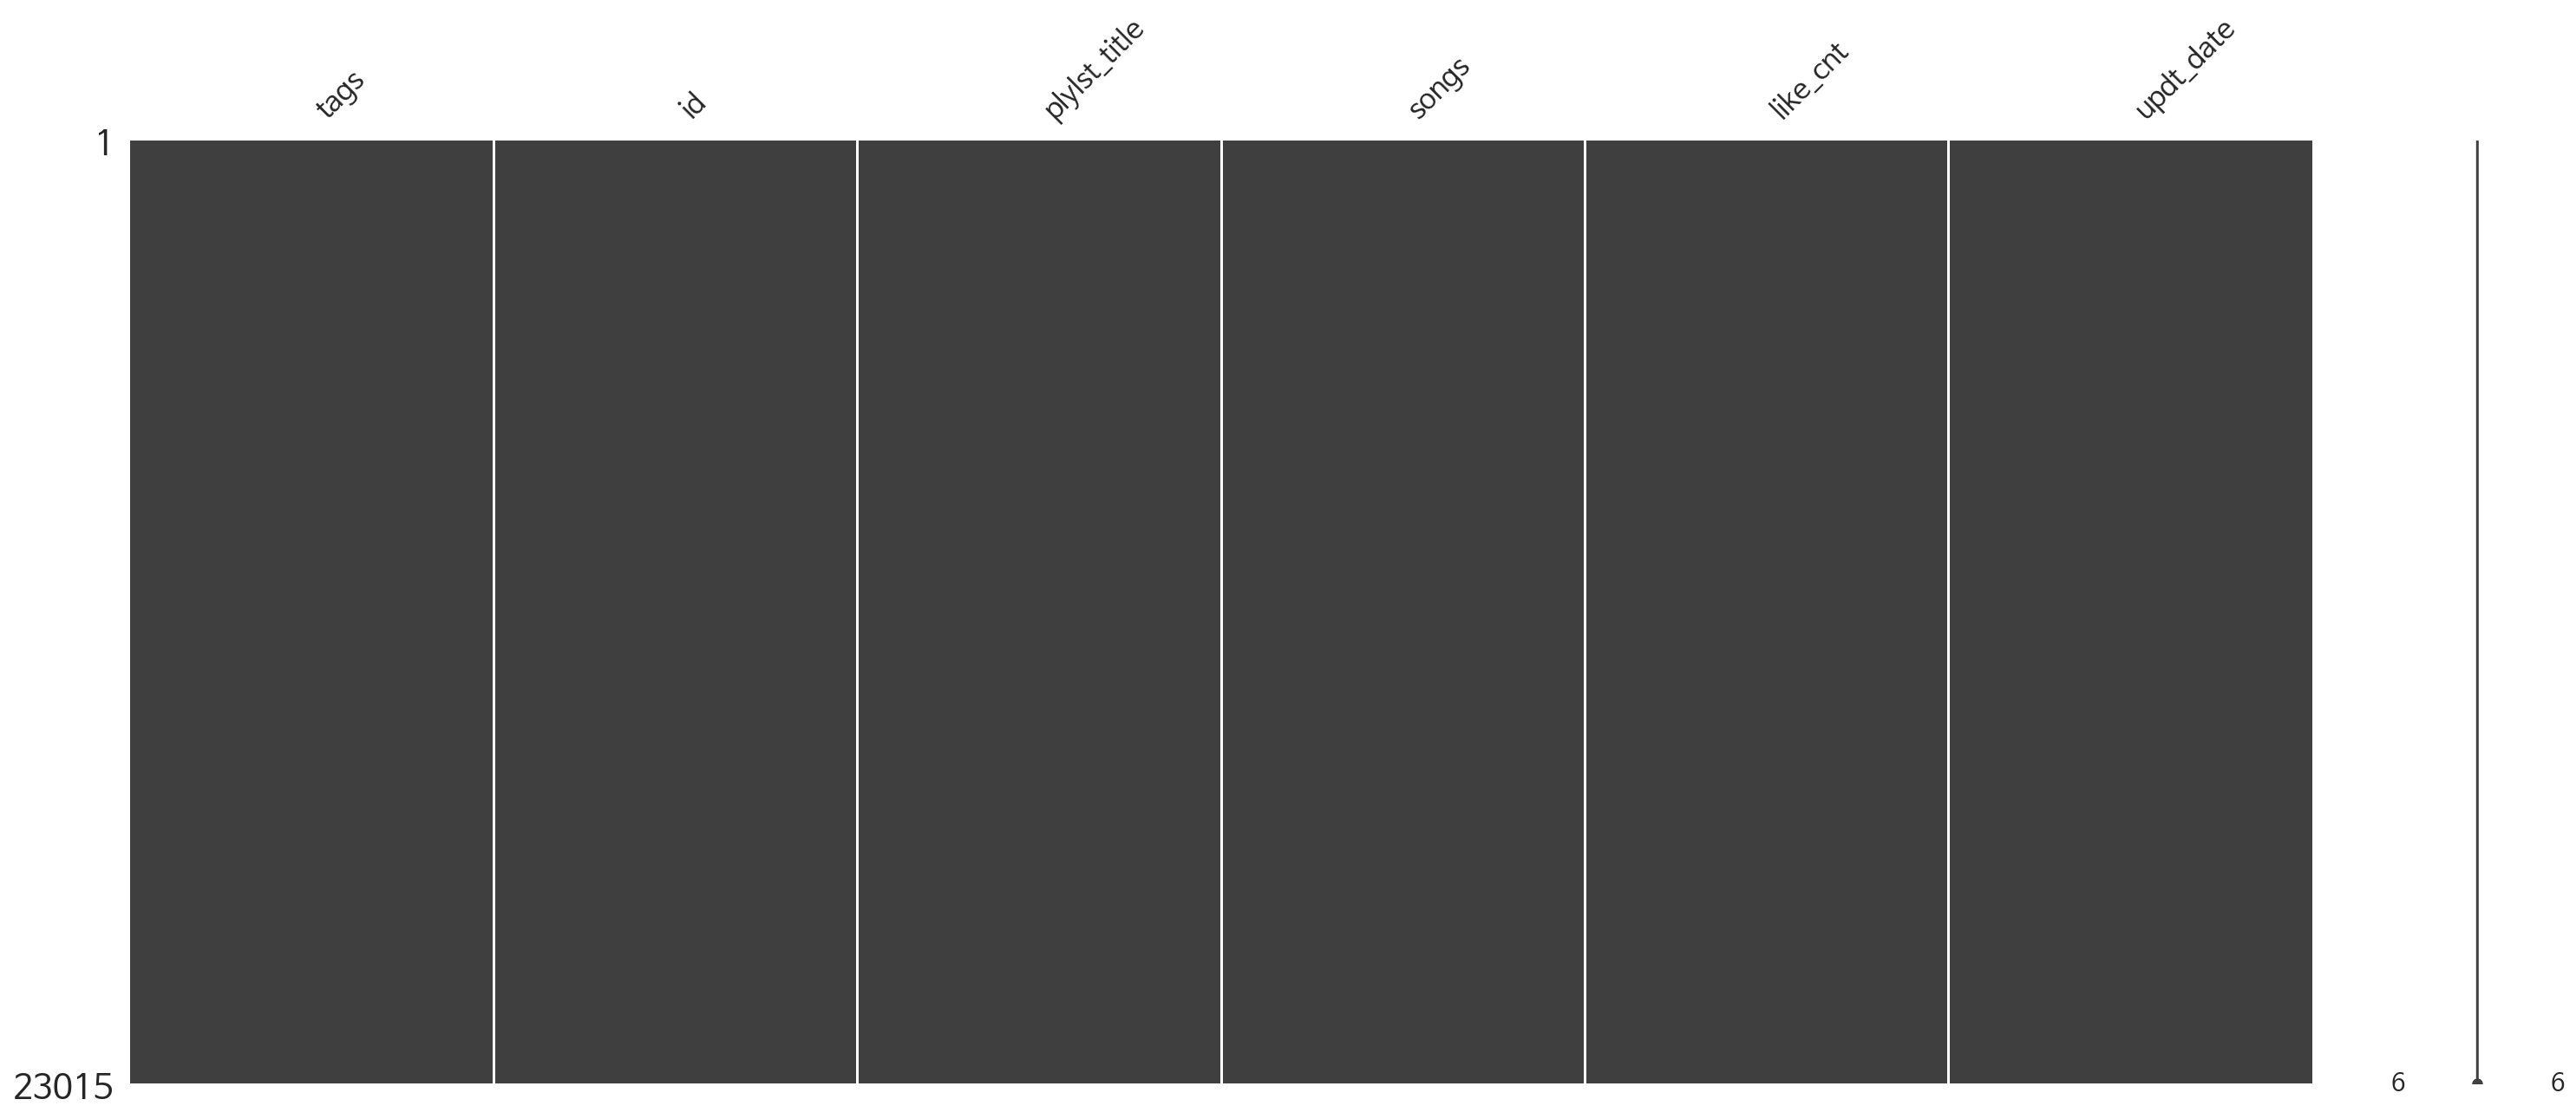

In [28]:
msno.matrix(val)

In [33]:
ls = []
for i in range(len(raw_val['plylst_title'])):
    ls.append(len(raw_val['plylst_title'][i]))

In [47]:
pd.DataFrame(ls).describe(percentiles=[0.805])

,0
count,23015.000000
mean,3.487508
std,8.057250
min,0.000000
50%,0.000000
80.5%,0.000000
max,55.000000


## songs to grn

In [161]:
raw_song_meta['song_gn_dtl_gnr']= raw_song_meta['song_gn_dtl_gnr_basket'].apply(','.join)

In [163]:
raw_song_meta['artist_name']= raw_song_meta['artist_name_basket'].apply(','.join)

In [232]:
id_gnr_df = raw_song_meta[['id','song_gn_dtl_gnr_basket']]
id_gnr_df.head()

,id,song_gn_dtl_gnr_basket
0,0,[GN0901]
1,1,"[GN1601, GN1606]"
2,2,[GN0901]
3,3,"[GN1102, GN1101]"
4,4,"[GN1802, GN1801]"


In [25]:
song_tag = pd.read_csv('./raw_data/song_tags.csv')

In [38]:
song_tag

,songs,tags
0,0,"['비오는날', '드라이브', '비오는날', '추억', '회상']"
1,3,"['1', '감성', '듣기좋은', '드라이브', 'Pop', '여행', '기분전환..."
2,4,"['뉴에이지', '뉴에이지']"
3,5,"['비오는날', '재즈', '락', '발라드', '휴식', '리메이크', '재즈',..."
4,6,"['클래식', '산책', '조깅']"
...,...,...
615137,707984,['월드뮤직']
615138,707985,"['Pop', '해외차트', '시대별차트', '신디로퍼', 'Pop', '1980'..."
615139,707986,"['힙합', '랩', '발라드', '감성', '리메이크곡', '카페', '잔잔한',..."
615140,707987,"['집중', '노동요', '새벽', '오후', '자장가', '공부']"


In [94]:
raw_train['tags']

0                                                       [락]
1                                                  [추억, 회상]
2                                                 [까페, 잔잔한]
3         [연말, 눈오는날, 캐럴, 분위기, 따듯한, 크리스마스캐럴, 겨울노래, 크리스마스,...
4                                                      [댄스]
                                ...                        
115066                 [록메탈, 밴드사운드, 록, 락메탈, 메탈, 락, extreme]
115067                                                 [일렉]
115068               [담시, 가족, 눈물, 그리움, 주인공, 나의_이야기, 사랑, 친구]
115069                        [잔잔한, 버스, 퇴근버스, Pop, 풍경, 퇴근길]
115070                               [노래추천, 팝송추천, 팝송, 팝송모음]
Name: tags, Length: 115071, dtype: object

In [93]:
raw_train['songs'].apply(lambda x : [ for i in x])

0         [525514, 129701, 383374, 562083, 297861, 13954...
1         [432406, 675945, 497066, 120377, 389529, 24427...
2         [83116, 276692, 166267, 186301, 354465, 256598...
3         [394031, 195524, 540149, 287984, 440773, 10033...
4         [159327, 553610, 5130, 645103, 294435, 100657,...
                                ...                        
115066    [429629, 441511, 612106, 516359, 691768, 38714...
115067    [321330, 216057, 534472, 240306, 331098, 23288...
115068    [50512, 249024, 250608, 371171, 229942, 694943...
115069    [533534, 608114, 343608, 417140, 609009, 30217...
115070    [26008, 456354, 324105, 89871, 135272, 143548,...
Name: songs, Length: 115071, dtype: object

In [88]:
song_tag

,songs,tags
0,0,"['비오는날', '드라이브', '비오는날', '추억', '회상']"
1,3,"['1', '감성', '듣기좋은', '드라이브', 'Pop', '여행', '기분전환..."
2,4,"['뉴에이지', '뉴에이지']"
3,5,"['비오는날', '재즈', '락', '발라드', '휴식', '리메이크', '재즈',..."
4,6,"['클래식', '산책', '조깅']"
...,...,...
615137,707984,['월드뮤직']
615138,707985,"['Pop', '해외차트', '시대별차트', '신디로퍼', 'Pop', '1980'..."
615139,707986,"['힙합', '랩', '발라드', '감성', '리메이크곡', '카페', '잔잔한',..."
615140,707987,"['집중', '노동요', '새벽', '오후', '자장가', '공부']"


In [22]:
song_tag.iloc[615137]

songs      707984
tags     ['월드뮤직']
Name: 615137, dtype: object

In [30]:
song_tag[song_tag['tags'] == "['월드뮤직']"]

,songs,tags
37,45,['월드뮤직']
503,581,['월드뮤직']
595,680,['월드뮤직']
1128,1301,['월드뮤직']
1372,1585,['월드뮤직']
...,...,...
613393,705992,['월드뮤직']
614235,706938,['월드뮤직']
614623,707390,['월드뮤직']
615033,707857,['월드뮤직']


In [225]:
raw_train

,tags,id,plylst_title,songs,like_cnt,updt_date
0,[락],61281,여행같은 음악,"[525514, 129701, 383374, 562083, 297861, 13954...",71,2013-12-19 18:36:19.000
1,"[추억, 회상]",10532,요즘 너 말야,"[432406, 675945, 497066, 120377, 389529, 24427...",1,2014-12-02 16:19:42.000
2,"[까페, 잔잔한]",76951,"편하게, 잔잔하게 들을 수 있는 곡.-","[83116, 276692, 166267, 186301, 354465, 256598...",17,2017-08-28 07:09:34.000
3,"[연말, 눈오는날, 캐럴, 분위기, 따듯한, 크리스마스캐럴, 겨울노래, 크리스마스,...",147456,크리스마스 분위기에 흠뻑 취하고 싶을때,"[394031, 195524, 540149, 287984, 440773, 10033...",33,2019-12-05 15:15:18.000
4,[댄스],27616,추억의 노래 ㅋ,"[159327, 553610, 5130, 645103, 294435, 100657,...",9,2011-10-25 13:54:56.000
...,...,...,...,...,...,...
115066,"[록메탈, 밴드사운드, 록, 락메탈, 메탈, 락, extreme]",120325,METAL E'SM #2,"[429629, 441511, 612106, 516359, 691768, 38714...",3,2020-04-17 04:31:11.000
115067,[일렉],106976,빠른 리스너를 위한 따끈따끈한 최신 인기 EDM 모음!,"[321330, 216057, 534472, 240306, 331098, 23288...",13,2015-12-24 17:23:19.000
115068,"[담시, 가족, 눈물, 그리움, 주인공, 나의_이야기, 사랑, 친구]",11343,#1. 눈물이 앞을 가리는 나의_이야기,"[50512, 249024, 250608, 371171, 229942, 694943...",4,2019-08-16 20:59:22.000
115069,"[잔잔한, 버스, 퇴근버스, Pop, 풍경, 퇴근길]",131982,퇴근 버스에서 편히 들으면서 하루를 마무리하기에 좋은 POP,"[533534, 608114, 343608, 417140, 609009, 30217...",4,2019-10-25 23:40:42.000


In [245]:
# 플레이리스트 아이디(id)와 매핑된 태그(tags) 추출
plylst_tag_map = raw_train[['id', 'tags']]

# unnest tags
plylst_tag_map_unnest = np.dstack(
    (
        np.repeat(plylst_tag_map.id.values, list(map(len, plylst_tag_map.tags))), 
        np.concatenate(plylst_tag_map.tags.values)
    )
)

# unnested 데이터프레임 생성 : plylst_tag_map
plylst_tag_map = pd.DataFrame(data = plylst_tag_map_unnest[0], columns = plylst_tag_map.columns)
plylst_tag_map['id'] = plylst_tag_map['id'].astype(str)

# unnest 객체 제거
del plylst_tag_map_unnest
plylst_tag_map

,id,tags
0,61281,락
1,10532,추억
2,10532,회상
3,76951,까페
4,76951,잔잔한
...,...,...
476326,131982,퇴근길
476327,100389,노래추천
476328,100389,팝송추천
476329,100389,팝송


In [253]:
plylst_tag_map.drop_duplicates('tags')

,id,tags
0,61281,락
1,10532,추억
2,10532,회상
3,76951,까페
4,76951,잔잔한
...,...,...
476035,122025,사랑하고있을때
476106,71648,우울해지고싶을때듣는노래
476120,107233,gershwin
476158,113924,슈가맨시즌3


In [246]:
# train_uniq_song_cnt = plylst_song_map.songs.nunique() # 유니크 곡 수
train_uniq_tag_cnt = plylst_tag_map.tags.nunique() # 유니크 태그 수

# print('곡 수 : %s' %train_uniq_song_cnt)
print('태그 수 : %s' %train_uniq_tag_cnt)

태그 수 : 29160


In [239]:
ls = []
for i in raw_train['songs'].iloc[:5]:
    for j in i:
        ls.append(id_gnr_df[id_gnr_df['id'] == j]['song_gn_dtl_gnr_basket'])

In [244]:
pd.DataFrame(ls

[525514    [GN1402, GN1401]
 Name: song_gn_dtl_gnr_basket, dtype: object,
 129701    [GN0901, GN0902, GN1001]
 Name: song_gn_dtl_gnr_basket, dtype: object,
 383374    [GN1012, GN1005, GN1001]
 Name: song_gn_dtl_gnr_basket, dtype: object,
 562083    [GN1013, GN0901, GN0902, GN1001]
 Name: song_gn_dtl_gnr_basket, dtype: object,
 297861    [GN1013, GN0901, GN0902, GN1001]
 Name: song_gn_dtl_gnr_basket, dtype: object,
 139541    [GN1013, GN0901, GN0902, GN1001]
 Name: song_gn_dtl_gnr_basket, dtype: object,
 351214    [GN1003, GN1013, GN1001]
 Name: song_gn_dtl_gnr_basket, dtype: object,
 650298    [GN0901]
 Name: song_gn_dtl_gnr_basket, dtype: object,
 531057    [GN1304, GN1301, GN1302]
 Name: song_gn_dtl_gnr_basket, dtype: object,
 205238    [GN0904, GN1402, GN1401, GN0901, GN1001]
 Name: song_gn_dtl_gnr_basket, dtype: object,
 706183    [GN1001]
 Name: song_gn_dtl_gnr_basket, dtype: object,
 127099    [GN1912, GN1904, GN1901]
 Name: song_gn_dtl_gnr_basket, dtype: object,
 660493    [GN09